In [1]:
#Priyaranjan Mishra
#20BCE10121

In [2]:
# 1 and 2

import pandas as pd
dataset='https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view'
url='https://drive.google.com/uc?id=' + dataset.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [4]:
# 3

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

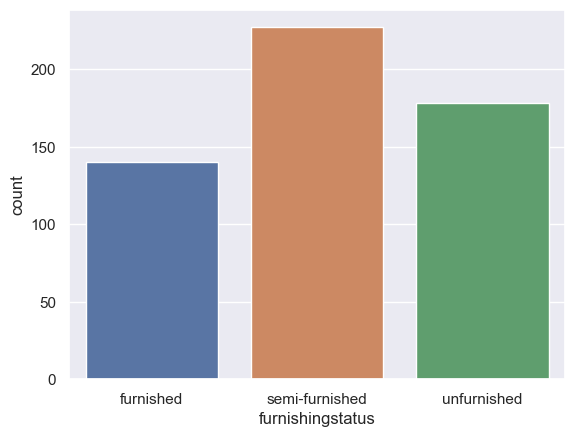

In [5]:
sns.set_theme(palette='deep')
# uni-variate
sns.countplot(data=df, x='furnishingstatus')
plt.show()

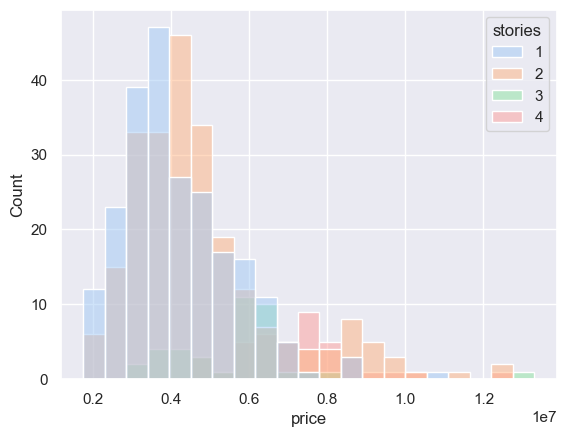

In [6]:
# bi-variate
sns.histplot(data=df, x='price', hue='stories', palette="pastel")
plt.show()

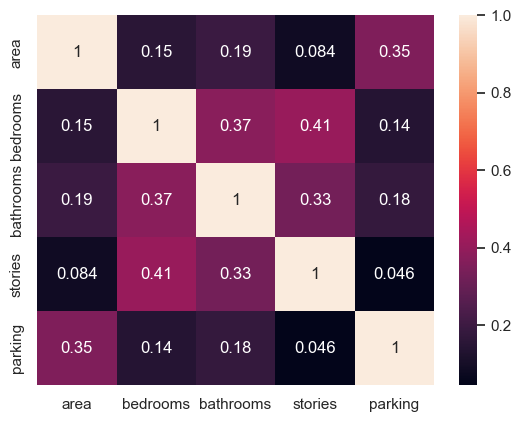

In [7]:
# multi-variate

def is_numeric(val):
  try:
    float(val)
    return True
  except ValueError:
    return False
corr = (df.loc[:, ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].applymap(lambda v: float(v) if is_numeric(v) else np.nan).dropna()).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
# 4

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# 5

df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [10]:
# no missing value

In [11]:
# 6

numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
z_thresh = 3
for value in numeric_columns:
    median = df[value].median()
    std = df[value].std()
    outliers = (df[value] - median).abs() > z_thresh * std
    df.loc[outliers,value] = np.nan
    df[value].fillna(median, inplace=True)

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.660573e+06,4983.533945,2.954128,1.244037,1.805505,0.627523
std,1.671084e+06,1851.792053,0.714674,0.429909,0.867492,0.794498
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6240.000000,3.000000,1.000000,2.000000,1.000000
max,9.870000e+06,10700.000000,5.000000,2.000000,4.000000,2.000000


In [13]:
# 7 
# we will use label encoder

from sklearn.preprocessing import LabelEncoder

In [14]:
lben = LabelEncoder()
category_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "furnishingstatus"]
for cols in category_cols:
  df[cols] = lben.fit_transform(df[cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,0
1,4340000.0,8960.0,4.0,1.0,4.0,1,0,0,0,1,0.0,0
2,4340000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1
3,4340000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,0
4,4340000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0


In [15]:
# 8 

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,0
1,8960.0,4.0,1.0,4.0,1,0,0,0,1,0.0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0


In [16]:
y.head()

0    4340000.0
1    4340000.0
2    4340000.0
3    4340000.0
4    4340000.0
Name: price, dtype: float64

In [17]:
# 9
# we use minmaxscaler

from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler()
scalery = MinMaxScaler()
X = scalerX.fit_transform(X) 
y = scalery.fit_transform(y.values.reshape(-1, 1))
X

array([[0.63756906, 0.75      , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.80773481, 0.75      , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.91823204, 0.5       , 1.        , ..., 0.        , 1.        ,
        0.5       ],
       ...,
       [0.21767956, 0.25      , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.13922652, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24309392, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [18]:
# 10

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)

(408, 11)
(137, 11)


In [19]:
# 11

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
# 12

lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# 13

y_pred = lr.predict(X_test)

In [22]:
# 14

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.1409046086213703
0.10216238022093338
0.4931429858306784
